The code follows from Chapter 10 of Deep Reinforcement Learning Hands-On by Maxim Lapan

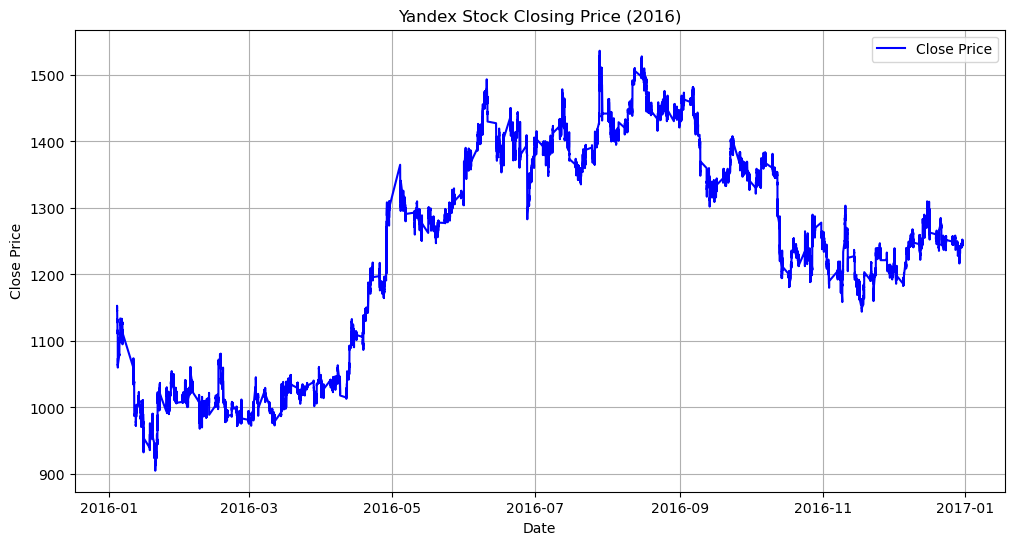

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("YNDX_160101_161231.csv")

# Strip spaces from column names
data.columns = data.columns.str.strip()

# Convert <DATE> and <TIME> to strings and properly format <TIME> as HH:MM:SS
data["DATETIME"] = pd.to_datetime(
    data["<DATE>"].astype(str) + " " + data["<TIME>"].astype(str).str.zfill(6), 
    format="%Y%m%d %H%M%S"
)

# Set DATETIME as the index
data.set_index("DATETIME", inplace=True)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data["<CLOSE>"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Yandex Stock Closing Price (2016)")
plt.legend()
plt.grid()
plt.show()


In [7]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
DATETIME,,,,,,,
2016-01-04 10:01:00,20160104,100100,1148.9,1148.9,1148.9,1148.9,0
2016-01-04 10:02:00,20160104,100200,1148.9,1148.9,1148.9,1148.9,50
2016-01-04 10:03:00,20160104,100300,1149.0,1149.0,1149.0,1149.0,33
2016-01-04 10:04:00,20160104,100400,1149.0,1149.0,1149.0,1149.0,4
2016-01-04 10:05:00,20160104,100500,1153.0,1153.0,1153.0,1153.0,0
...,...,...,...,...,...,...,...
2016-12-30 18:38:00,20161230,183800,1244.0,1248.5,1243.5,1248.5,191
2016-12-30 18:39:00,20161230,183900,1248.5,1248.5,1248.5,1248.5,11
2016-12-30 18:40:00,20161230,184000,1248.5,1248.5,1248.5,1248.5,526


The observation will include the following information:
- N past bars, where each has open, high, low, and close prices
- An indication that the share was bought some time ago (only one share at a time will be possible)
- Profit or loss that we currently have from our current position (the share bought)


At every step, after every minute's bar, the agent can take one of the following
actions:
- Do nothing: skip the bar without taking an action
- Buy a share: if the agent has already got the share, nothing will be bought; otherwise, we will pay the commission, which is usually some small percentage of the current price
- Close the position: if we do not have a previously purchased share, nothing will happen; otherwise, we will pay the commission for the trade

In [11]:
import gym
import gym.spaces
from gym.utils import seeding
from gym.envs.registration import EnvSpec
import enum
import numpy as np

In [12]:
class Actions(enum.Enum):
    Skip = 0
    Buy = 1
    Close = 2

In [13]:
class StocksEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    spec = EnvSpec("StocksEnv-v0")

    @classmethod
    def from_dir(cls, data_dir, **kargs):
        prices = {
            file: data.load_relative(file)
            for file in data.price_files(data_dir)
        }
        return StocksEnv(prices, **kwargs)


TypeError: __init__() missing 1 required positional argument: 'entry_point'